In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
rcParams['figure.figsize'] = (10,8)

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [4]:
from sklearn.datasets import make_blobs, make_moons, make_classification

In [5]:
class LinearClassifier:
    def __init__(self,
                 loss: str = 'log', 
                 alpha: float = 0.01, 
                 max_iter: int = 500, 
                 eps: float = 1e-8,
                ):
        if loss not in ('log', 'hinge', 'perceptron'):
            print('Invalid Loss')
            raise NotImplementedError
            
        loss_fn_dict = {
            'log': self._sigmoid, # использовать логистическую функцию
            'hinge': self._maximum, # функция потерь Hinge
            'perceptron': self._indicator, # функцию потерь, которая равна 0, если предсказание верно, и 1, если предсказание неверн
        }
            
        self.alpha = alpha
        self.loss_fn = loss_fn_dict[loss]
        self.max_iter = max_iter
        self.w = None
        self.eps = eps
        self.losses = []
        
    
    def fit(self, X, y, lr=0.1, batch_size=None):
        if np.sign(y).all() != 1:
            y = 2*y - 1
        
        m, n = X.shape
        n += 1  # for bias
        
        if batch_size is None:
            batch_size = m
            
        x = np.hstack([np.ones((m, 1)), X])
        self.w = np.random.randn(n)
        
        for i in range(self.max_iter):
            inds = np.random.choice(np.arange(m), size=batch_size)
            self.w = self.w + lr * (
                self.loss_fn(-y[inds] * (x[inds] @ self.w)) * y[inds] @ x[inds] - self.alpha * self.w
            ) / batch_size
            
            loss = self._logloss(y, x)
            self.losses.append(loss)            
    
    def _logloss(self, y, x):
        loss = np.clip(-y * (x @ self.w), 1e-8, 1-1e-8).mean()
        return np.log(1 + np.exp(loss))
    
    
    def predict_proba(self, X):
        m, n = X.shape
        n += 1  # for bias
        x = np.hstack([np.ones((m, 1)), X])
        
        return self._sigmoid(x @ self.w)
    
    
    def predict(self, X):
        probas = self.predict_proba(X)
        
        return probas.round()
            
    
    def _sigmoid(self, x):
        return 1.0 / (1.0 + np.exp(-x))
    
    
    def _indicator(self, x):
        return (x > 0).astype(int)
    
    
    def _maximum(self, x):
        return np.max(np.hstack([np.zeros((len(x), 1)), x.reshape(-1,1)]), axis=1)

In [6]:
def plot_mesh_grid(clf, datasets):
    
    i = 1
    plt.figure(figsize=(18,7))
    for ds in datasets:
        plt.subplot(1, len(datasets), i)
    
        eps = 0.3
        
        clf.fit(ds[0], ds[1])

        xx, yy = np.meshgrid(np.linspace(np.min(ds[0][:,0]) - eps, np.max(ds[0][:,0]) + eps, 200),
                             np.linspace(np.min(ds[0][:,1]) - eps, np.max(ds[0][:,1]) + eps, 200))
        
        try:
            z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()][:, :])[:, 1].reshape(xx.shape)
        except:
            z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()][:, :]).reshape(xx.shape)

        plt.pcolormesh(xx, yy, z, cmap='RdYlBu', shading='auto')
        plt.scatter(ds[0][:, 0], ds[0][:, 1], c=ds[1], cmap='Set1', edgecolors='black')
        
        plt.title(f'Accuracy: {accuracy_score(ds[1], clf.predict(ds[0]))}')
        
        i+=1

# Test Datasets

In [7]:
datasets = (
        make_moons(300, noise=0.2, random_state=42),
        make_blobs(n_samples=300, centers=[[-2,0.5],[2,-0.5]], cluster_std=1, random_state=42),
        make_classification(n_samples=300, n_features=2, n_informative=2, n_redundant=0)
    )

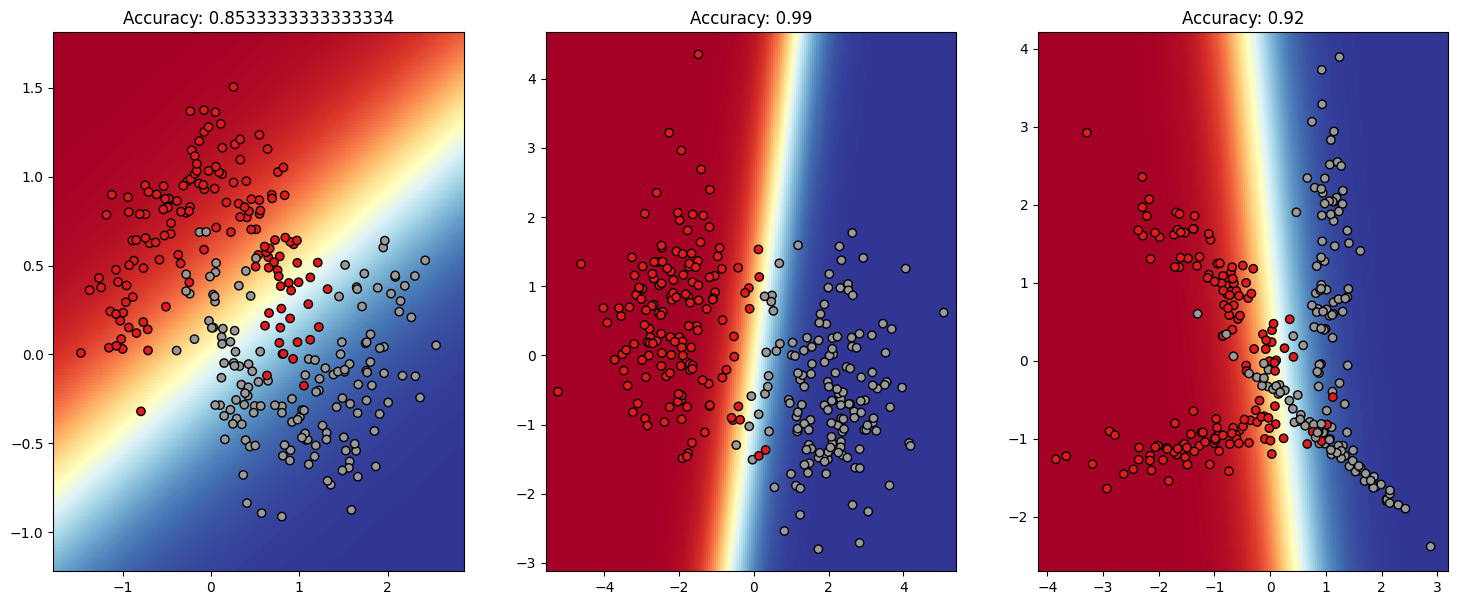

In [8]:
plot_mesh_grid(LinearClassifier(), datasets)

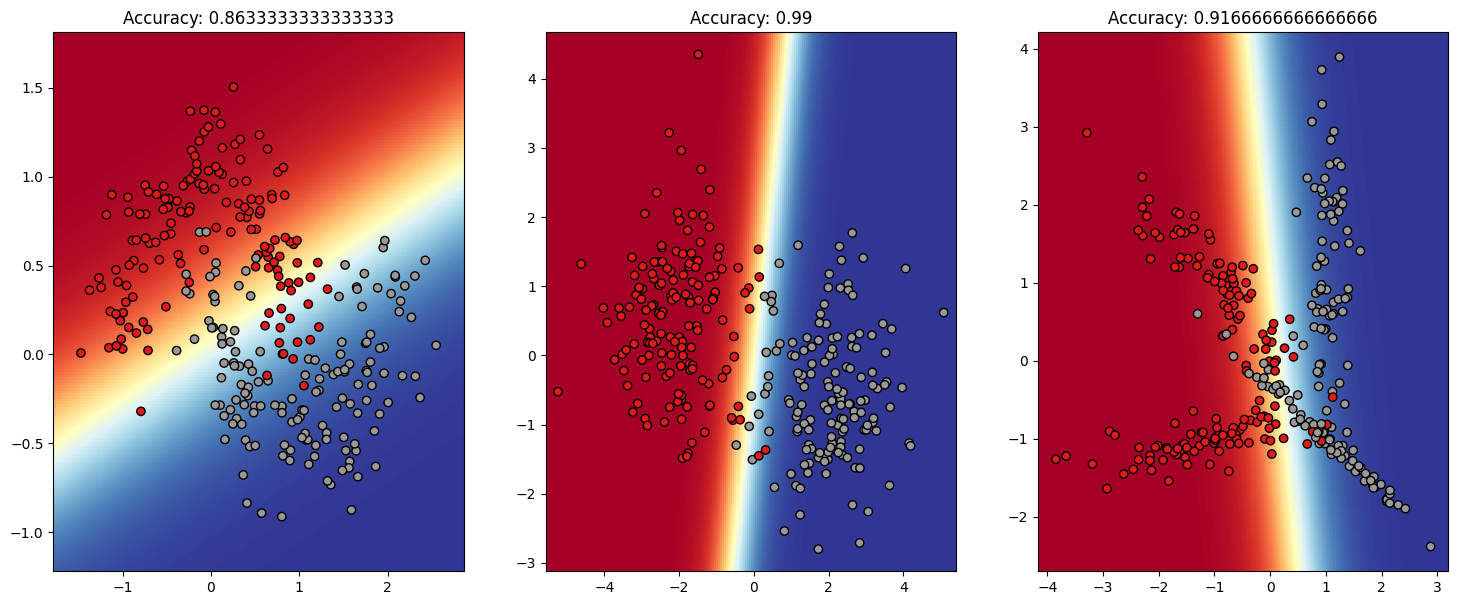

In [9]:
plot_mesh_grid(LogisticRegression(), datasets)

# Breast Cancer

In [21]:
load_breast_cancer?

Signature: load_breast_cancer(*, return_X_y=False, as_frame=False)
Docstring:
Load and return the breast cancer wisconsin dataset (classification).

The breast cancer dataset is a classic and very easy binary classification
dataset.

=================   ==============
Classes                          2
Samples per class    212(M),357(B)
Samples total                  569
Dimensionality                  30
Features            real, positive
=================   ==============

The copy of UCI ML Breast Cancer Wisconsin (Diagnostic) dataset is
downloaded from:
https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

Read more in the :ref:`User Guide <breast_cancer_dataset>`.

Parameters
----------
return_X_y : bool, default=False
    If True, returns ``(data, target)`` instead of a Bunch object.
    See below for more information about the `data` and `target` object.

    .. versionadded:: 0.18

as_frame : bool, default=False
    If True, the data is a pandas DataFrame i

In [22]:
x

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [23]:
x = load_breast_cancer().data
y = load_breast_cancer().target

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [18]:
logit = LinearClassifier(loss='hinge', max_iter=500)
logit.fit(x, y)

In [19]:
accuracy_score(logit.predict(x), y)

0.9507908611599297

In [25]:
np.round(logit.predict_proba(x), 1)

array([0. , 0.1, 0. , 0. , 0. , 0.2, 0. , 0.5, 0. , 0. , 0.3, 0.1, 0.1,
       0. , 0.2, 0. , 0.1, 0. , 0. , 0.6, 0.9, 1. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0.1, 0. , 0.2, 0. , 0. , 0. , 0. , 0.1, 1. , 0.2,
       0.2, 0.7, 0.2, 0. , 0.2, 0.2, 0. , 1. , 0.1, 0.7, 0.6, 0.7, 1. ,
       1. , 0. , 0.3, 0.6, 0. , 0.1, 1. , 1. , 1. , 0.9, 0. , 1. , 0.1,
       0. , 1. , 0.8, 0.6, 0.7, 0. , 1. , 0. , 0.6, 1. , 0. , 1. , 0. ,
       0. , 0.8, 0.9, 0.4, 0. , 0. , 0.9, 0. , 0.3, 0. , 0.8, 0.5, 0.5,
       0.1, 0.9, 0.7, 0. , 0. , 1. , 1. , 1. , 0.7, 0.1, 1. , 0.9, 0.9,
       1. , 0. , 0.8, 0.9, 0. , 0.8, 0.9, 0.9, 0.7, 1. , 1. , 1. , 1. ,
       0. , 0. , 0. , 1. , 0. , 0. , 0.6, 1. , 1. , 0.3, 0.1, 0.3, 0. ,
       1. , 0. , 0.1, 0.6, 0. , 0.7, 0.9, 1. , 0. , 1. , 1. , 0.1, 0.9,
       0.8, 1. , 1. , 0. , 0.9, 0.6, 0.9, 0.8, 1. , 1. , 1. , 0.5, 1. ,
       0. , 0.8, 1. , 1. , 0.3, 0. , 0. , 0.9, 0. , 0.7, 1. , 0.1, 0. ,
       0.9, 0.9, 0.2, 0. , 1. , 1. , 1. , 1. , 0. , 0.9, 1. , 0.

In [13]:
logit.w

array([-0.47024384,  0.23301037, -0.74895902, -1.25694658, -0.1145061 ,
        0.61593369, -0.4516458 , -0.19463427, -1.91857061,  0.21827195,
        0.71721445, -0.211459  , -0.5676354 , -0.87495704, -1.23893098,
        0.21963645,  0.1258318 , -0.11394036,  0.43300508,  0.70693745,
       -0.40588119, -0.85024603, -0.10768329, -0.34733325, -0.03543069,
       -1.43559074,  1.15734292,  1.34381265, -1.07436734, -1.89194718,
       -0.18068648])

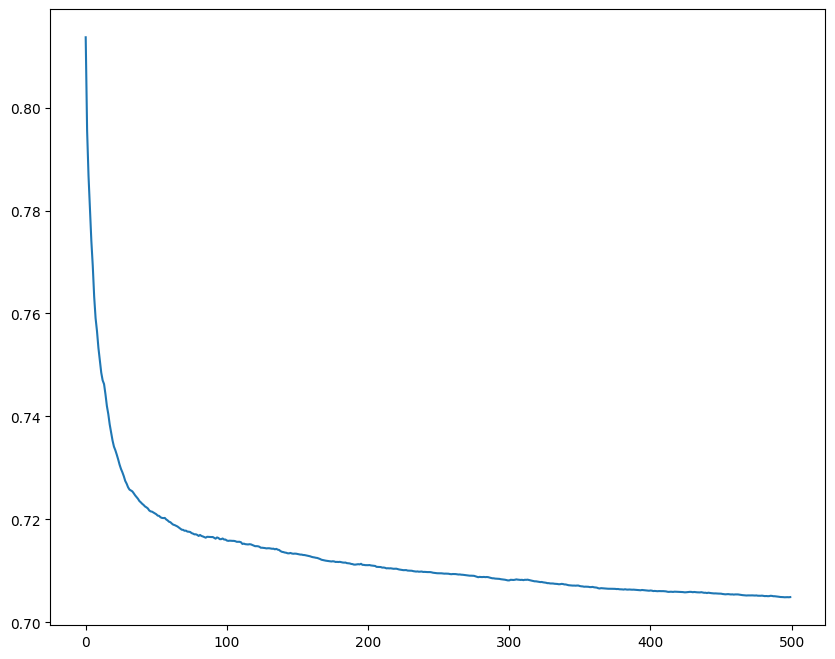

In [14]:
plt.plot(logit.losses)